In [1]:
# David Avallone & Kelly Reynolds Computer Vision

import cv2 
from matplotlib import pyplot as plt
import math
import numpy as np
import os

In [2]:
# this code was the original inspiration for the below function but did not work.

# def getPupil(frame):
#     # pupilImg = np.zeros_like(frame)
#     pupilImg = cv2.UMat(frame)
#     cv2.inRange(frame, (30,30,30), (80,80,80), pupilImg)
#     pupilImg = cv2.cvtColor(pupilImg, cv2.COLOR_BGR2GRAY)
#     contours, _ = cv2.findContours(pupilImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     del pupilImg
#     pupilImg = frame.copy()
#     for contour in contours:
#         moments = cv2.moments(contour)
#         area = moments['m00']
#         if (area > 50):
#             pupilArea = area
#             x = moments['m10'] / area
#             y = moments['m01'] / area
#             pupil = contour
#             centroid = (int(x), int(y))
#             cv2.drawContours(pupilImg, [pupil], -1, (0, 0, 0), 2)
#             break
#     return pupilImg

# def getIris(frame):
#     iris = []
#     copyImg = frame.copy()
#     resImg = frame.copy()
#     grayImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     mask = np.zeros_like(frame)
#     grayImg = cv2.Canny(grayImg, 5, 70)
#     grayImg = cv2.GaussianBlur(grayImg, (7, 7), 0)
#     circles = getCircles(grayImg)
#     iris.append(resImg)
#     if circles is not None:
#         for circle in circles:
#             rad = int(circle[2])
#             global centroid
#             centroid = (int(circle[0]), int(circle[1]))
#             cv2.circle(mask, centroid, rad, (255, 255, 255), -1)
#             mask = cv2.bitwise_not(mask)
#             mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)  # Convert mask to single-channel
#             cv2.subtract(frame, copyImg, resImg, mask)
#             x = int(centroid[0] - rad)
#             y = int(centroid[1] - rad)
#             w = int(rad * 2)
#             h = w
#             resImgROI = resImg[y:y+h, x:x+w]
#             return resImgROI
#     return resImg

# def getCircles(image):
#     i = 80
#     while i < 151:
#         circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=2, minDist=100.0,
#                                    param1=30, param2=i, minRadius=100, maxRadius=140)
#         if circles is not None and len(circles) == 1:
#             return circles[0]
#         i += 1
#     return []

In [3]:
centroid = (0,0)
# Holds the iris' radius
radius = 0
# Holds the current element of the image used by the getNewEye function
currentEye = 0
# Holds the list of eyes (filenames)
eyesList = []

def getNewEye(list):
	global currentEye
	if (currentEye >= len(list)):
		currentEye = 0
	newEye = list[currentEye]
	currentEye += 1
	return (newEye)

def getCircles(image):
    i = 80
    while i < 151:
        circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=2, minDist=105.0, param1=30, param2=i, minRadius=100, maxRadius=140)
        if circles is not None and len(circles) == 1:
            return circles[0]
        i += 1
    return []

def getPupil(frame):
    # Convert frame to UMat
    frame = cv2.UMat(frame)
    # Thresholding
    pupilImg = cv2.inRange(frame, (30,30,30), (80,80,80))
    # Find contours
    contours, _ = cv2.findContours(pupilImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Convert UMat to numpy array for copying
    frame = cv2.UMat.get(frame)
    # Draw circle around pupil
    pupilImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    pupilImg = cv2.cvtColor(pupilImg, cv2.COLOR_GRAY2BGR)
    for contour in contours:
        moments = cv2.moments(contour)
        area = moments['m00']
        if (area > 50):
            x = int(moments['m10'] / area)
            y = int(moments['m01'] / area)
            radius = int(np.sqrt(area / np.pi))
            cv2.circle(pupilImg, (x, y), radius, (0, 0, 0), cv2.FILLED)
            break

    return pupilImg

def getIris1(frame):
    copyImg = frame.copy()
    resImg = frame.copy()
    grayImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(frame)
    grayImg = cv2.Canny(grayImg, 5, 70)
    grayImg = cv2.GaussianBlur(grayImg, (7, 7), 0)
    circles = cv2.HoughCircles(grayImg, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            rad = int(circle[2])
            global centroid
            centroid = (int(circle[0]), int(circle[1]))
            cv2.circle(mask, centroid, rad, (255, 255, 255), -1)
            mask = cv2.bitwise_not(mask)
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)  # Convert mask to single-channel
            cv2.subtract(frame, copyImg, resImg, mask)
            cv2.circle(resImg, centroid, rad, (0, 0, 0), 2)
            break

    return resImg

def getIris2(frame):
    copyImg = frame.copy()
    resImg = frame.copy()
    grayImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(frame)
    grayImg = cv2.Canny(grayImg, 5, 70)
    grayImg = cv2.GaussianBlur(grayImg, (7, 7), 0)
    circles = getCircles(grayImg)
    if len(circles) > 0:
        for circle in circles:
            rad = int(circle[2])
            global centroid
            centroid = (int(circle[0]), int(circle[1]))
            cv2.circle(mask, centroid, rad, (255, 255, 255), -1)
            mask = cv2.bitwise_not(mask)
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)  # Convert mask to single-channel
            cv2.subtract(frame, copyImg, resImg, mask)
            cv2.circle(resImg, centroid, rad, (0, 0, 0), 2)
            break

    return resImg

def getIris3(frame, pupil_centroid):
    copyImg = frame.copy()
    resImg = frame.copy()
    grayImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(frame)
    grayImg = cv2.Canny(grayImg, 5, 70)
    grayImg = cv2.GaussianBlur(grayImg, (7, 7), 0)
    circles = cv2.HoughCircles(grayImg, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            rad = int(circle[2])
            global centroid
            centroid = (int(circle[0]), int(circle[1]))
            # Calculate the distance between the iris circle and the pupil centroid
            distance = np.sqrt((centroid[0] - pupil_centroid[0])**2 + (centroid[1] - pupil_centroid[1])**2)
            if distance < rad:  # Only proceed if the pupil is within the iris circle
                cv2.circle(mask, centroid, rad, (255, 255, 255), -1)
                mask = cv2.bitwise_not(mask)
                mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)  # Convert mask to single-channel
                cv2.subtract(frame, copyImg, resImg, mask)
                cv2.circle(resImg, centroid, rad, (0, 0, 0), 2)
                break
    return resImg

This one uses old approach

Error loading image: CASIA-Iris-Interval/001/L/Thumbs.db


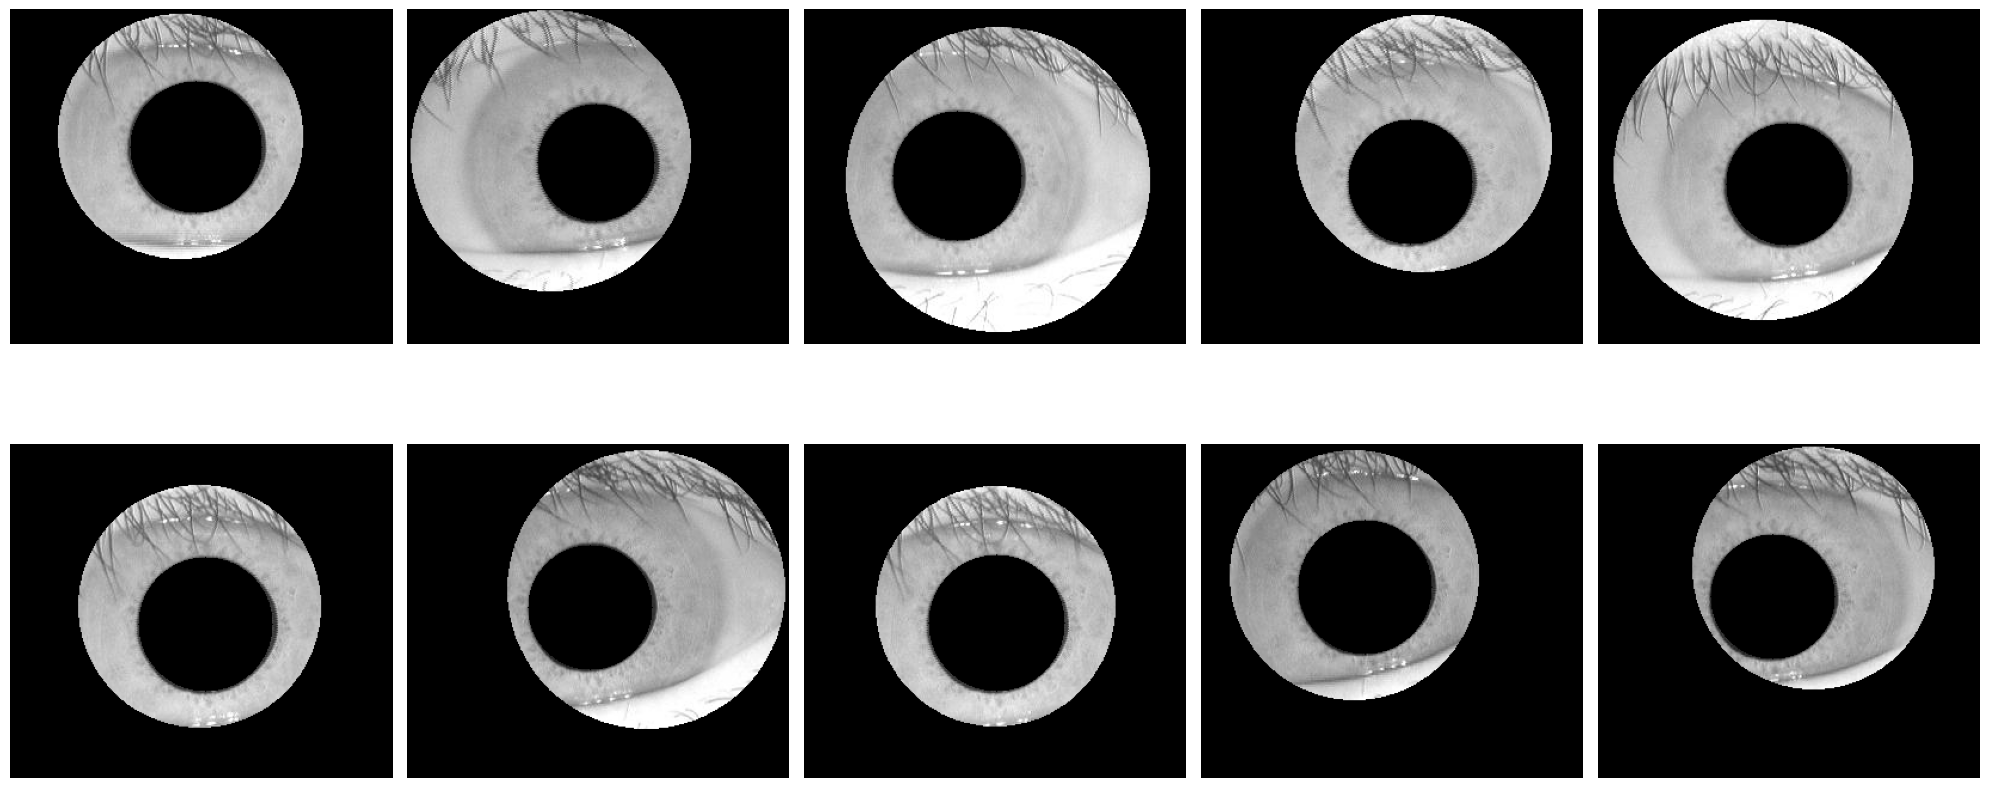

In [4]:
# Path to the directory containing the images
directory = 'CASIA-Iris-Interval/001/L/'

# Get a list of all files in the directory
eyesList = os.listdir(directory)

# Create a figure to plot the images
plt.figure(figsize=(20, 10))

# Loop through each file in the directory
for i in range(len(eyesList)):

    eye = getNewEye(eyesList)
    image_path = os.path.join(directory, eye)
    if not os.path.isfile(image_path):
        print(f"File not found: {image_path}")
        continue

    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Error loading image: {image_path}")
        continue
    
    # frame = cv2.imread("CASIA-Iris-Interval/001/L/"+eye)
    
    # Get the pupil and iris
    output = getPupil(frame)
    iris = getIris1(output)
    
    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(iris)
    plt.axis("off")

plt.tight_layout()
plt.show()

Error loading image: CASIA-Iris-Interval/001/L/Thumbs.db


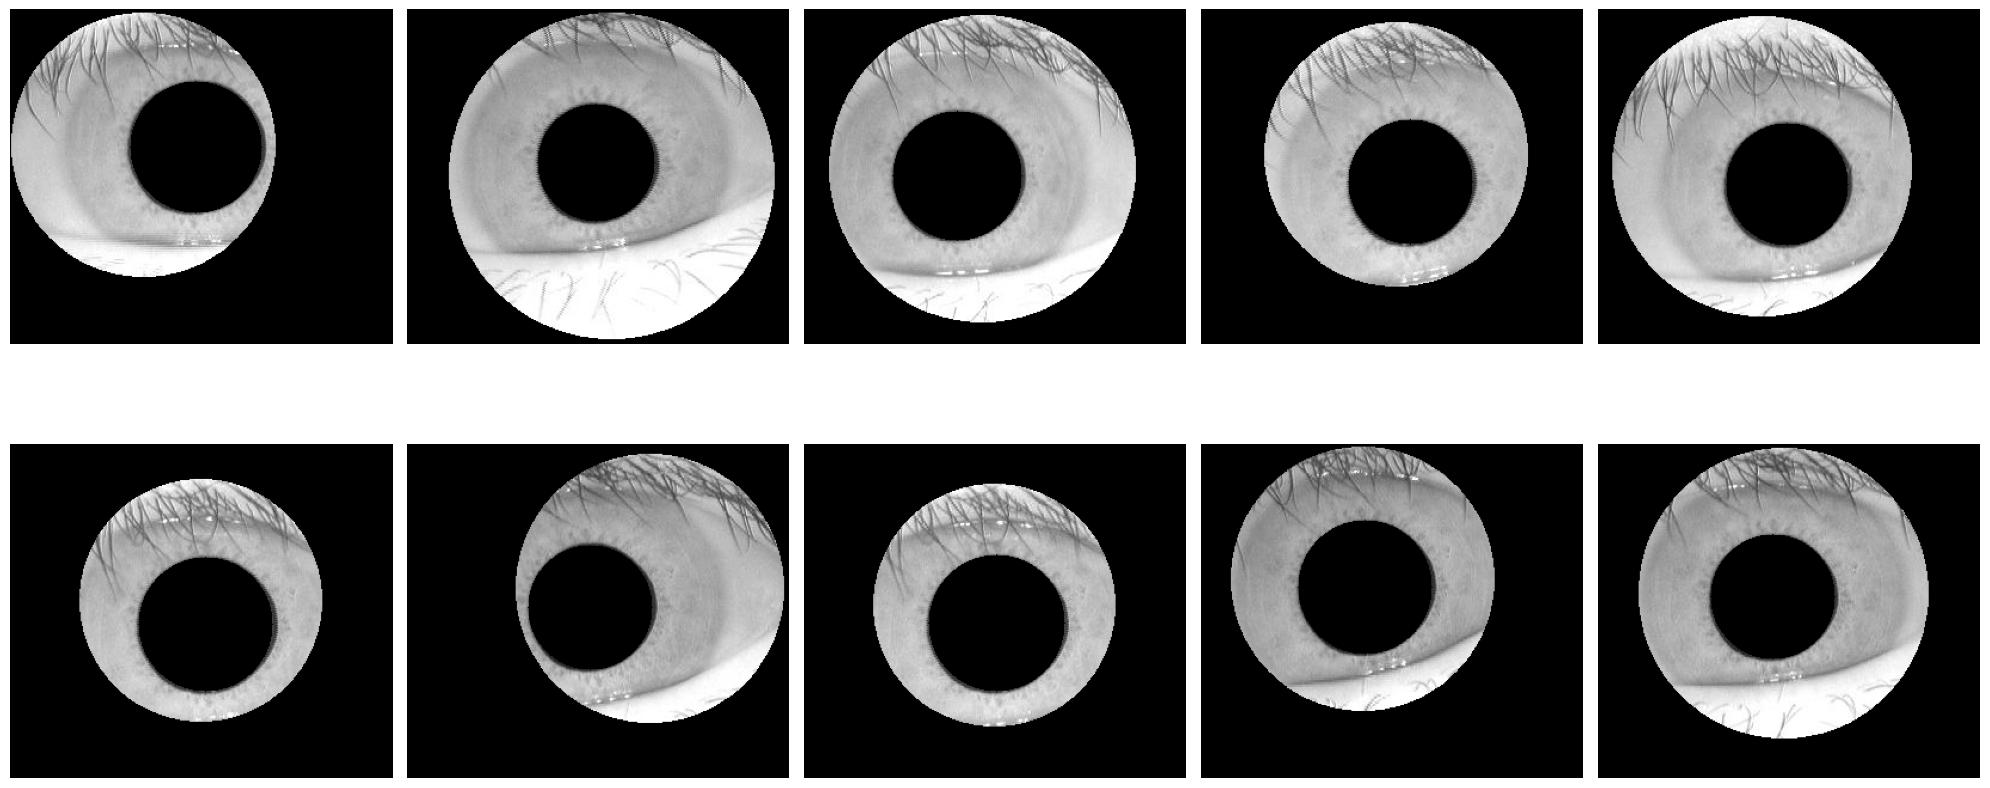

In [5]:
# Path to the directory containing the images
directory = 'CASIA-Iris-Interval/001/L/'

# Get a list of all files in the directory
eyesList = os.listdir(directory)

# Create a figure to plot the images
plt.figure(figsize=(20, 10))

# Loop through each file in the directory
for i in range(len(eyesList)):

    eye = getNewEye(eyesList)
    image_path = os.path.join(directory, eye)
    if not os.path.isfile(image_path):
        print(f"File not found: {image_path}")
        continue

    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Error loading image: {image_path}")
        continue
        
    # Get the pupil and iris
    output = getPupil(frame)
    iris = getIris2(output)
    
    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(iris)
    plt.axis("off")

plt.tight_layout()
plt.show()

(155, 125)
(142, 106)
(120, 118)
(162, 142)
(186, 112)
(138, 134)
(158, 136)
(200, 122)
(160, 136)
(128, 110)
Error loading image: CASIA-Iris-Interval/001/L/Thumbs.db


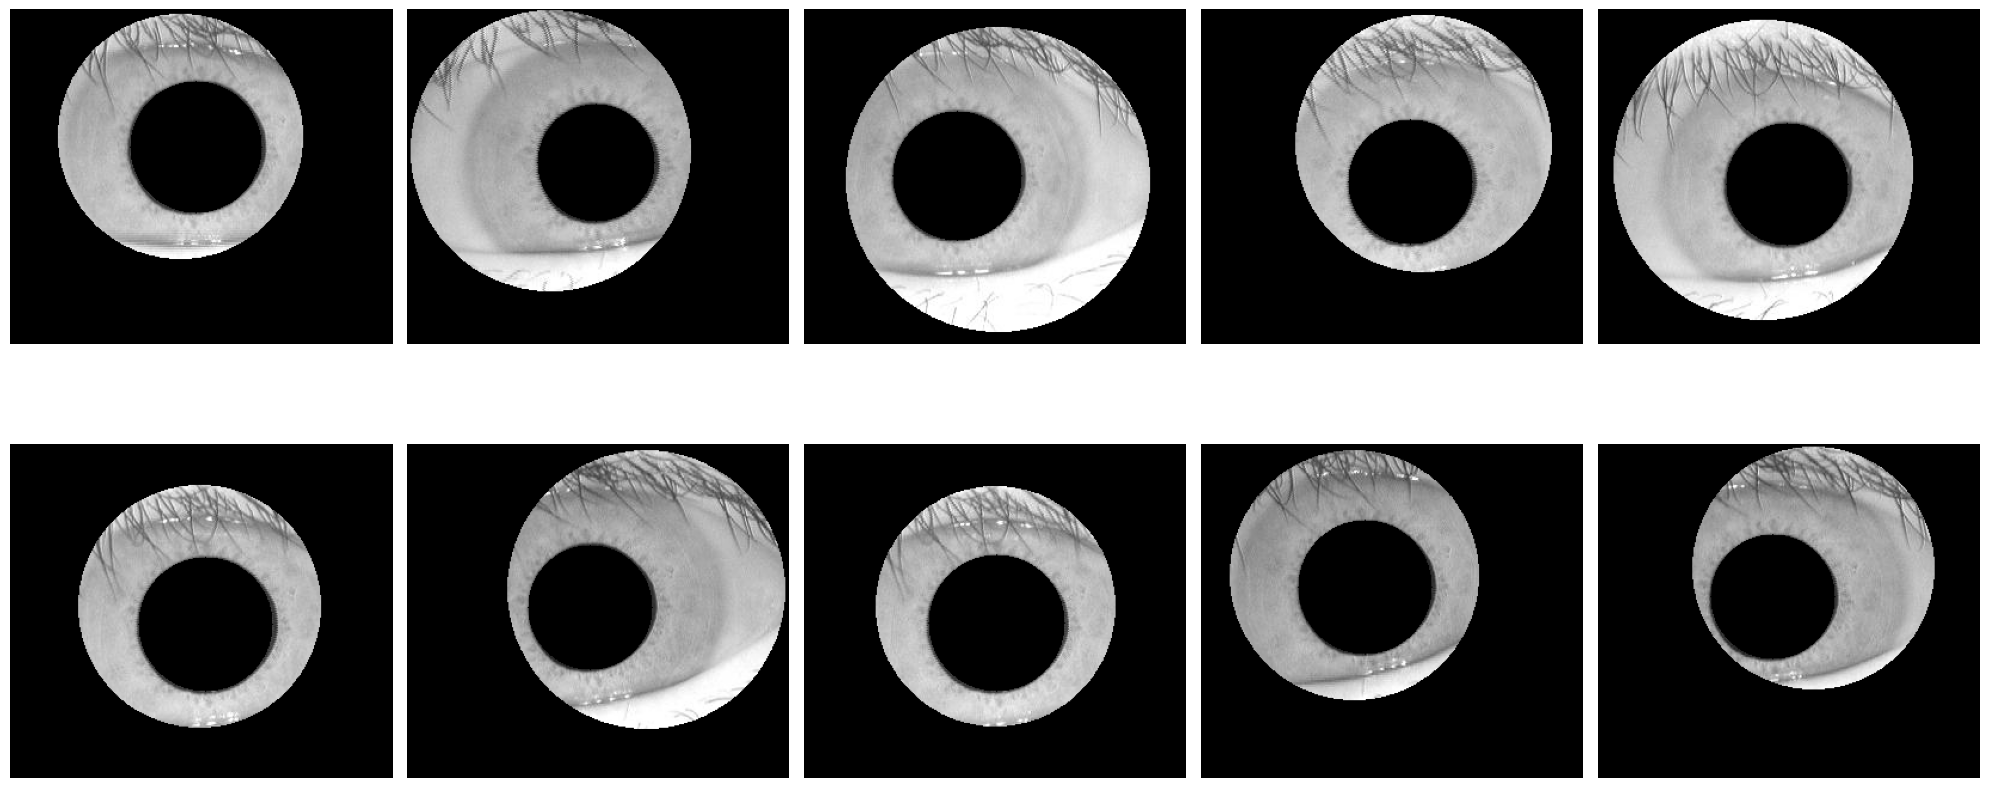

In [6]:
# Path to the directory containing the images
directory = 'CASIA-Iris-Interval/001/L/'

# Get a list of all files in the directory
eyesList = os.listdir(directory)

# Create a figure to plot the images
plt.figure(figsize=(20, 10))

# Loop through each file in the directory
for i in range(len(eyesList)):

    eye = getNewEye(eyesList)
    image_path = os.path.join(directory, eye)
    if not os.path.isfile(image_path):
        print(f"File not found: {image_path}")
        continue

    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Error loading image: {image_path}")
        continue
        
    # Get the pupil and iris
    output = getPupil(frame)
    print(centroid)
    iris = getIris3(output,centroid)
    
    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(iris)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [8]:
def process_eyes(directory, output_directory):
    # Get a list of all subdirectories (001, 002, etc.) in the directory
    subdirectories = [f.path for f in os.scandir(directory) if f.is_dir()]
    
    for subdir in subdirectories:
        # Create a new directory for the processed images
        new_subdir = os.path.join(output_directory, os.path.basename(subdir))
        os.makedirs(new_subdir, exist_ok=True)

        # Process images in both 'L' and 'R' subdirectories
        for sub_eye_dir in ['L', 'R']:
            eyesList = os.listdir(os.path.join(subdir, sub_eye_dir))

            for eye in eyesList:
                image_path = os.path.join(subdir, sub_eye_dir, eye)
                if not os.path.isfile(image_path):
                    print(f"File not found: {image_path}")
                    continue

                frame = cv2.imread(image_path)
                if frame is None:
                    print(f"Error loading image: {image_path}")
                    continue

                # Process the image to get the iris
                output = getPupil(frame)
                iris = getIris2(output)

                # Save the processed iris image
                save_path = os.path.join(new_subdir, f"{sub_eye_dir}_iris_{eye}")
                cv2.imwrite(save_path, iris)

# Path to the directory containing the CASIA images
input_directory = 'CASIA-Iris-Interval/'

# Path to the directory where you want to save the processed images
output_directory = 'Processed-CASIA-Iris-Interval/'

# Process the eyes in the input directory and save the processed images in the output directory
process_eyes(input_directory, output_directory)

Error loading image: CASIA-Iris-Interval/001\L\Thumbs.db
Error loading image: CASIA-Iris-Interval/001\R\Thumbs.db
Error loading image: CASIA-Iris-Interval/008\L\Thumbs.db
Error loading image: CASIA-Iris-Interval/116\L\Thumbs.db
Error loading image: CASIA-Iris-Interval/116\R\Thumbs.db


In [9]:
input_directory = 'CASIA-Iris-Lamp/'

# Path to the directory where you want to save the processed images
output_directory = 'Processed-CASIA-Iris-Lamp/'

# Process the eyes in the input directory and save the processed images in the output directory
process_eyes(input_directory, output_directory)

Error loading image: CASIA-Iris-Lamp/029\R\Thumbs.db
Error loading image: CASIA-Iris-Lamp/209\L\Thumbs.db
Error loading image: CASIA-Iris-Lamp/209\R\Thumbs.db


KeyboardInterrupt: 

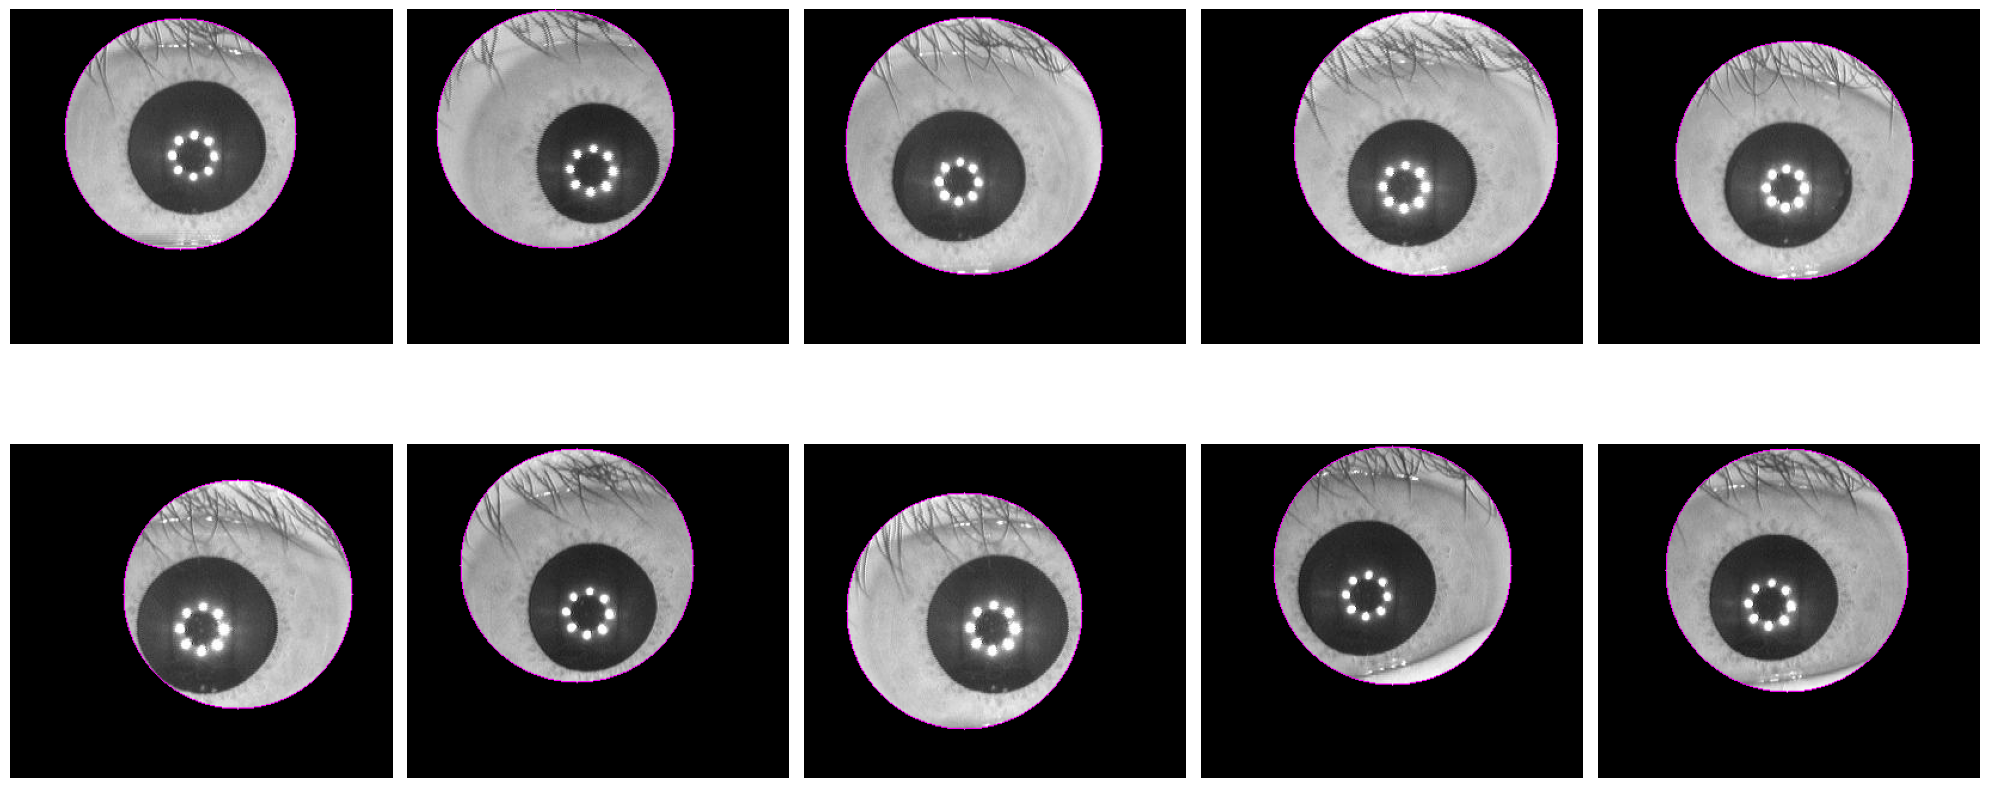

In [ ]:
# This is a test run but the images are not as good as the above method.

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    detected_circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 100, param1=50, param2=50, minRadius=10, maxRadius=115)

    mask = np.zeros_like(img)
    white_color = (255, 255, 255)
    line_color = (255, 0, 255)
    filled_circle = -1
    line_thickness = 1

    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))
        max_radius_index = np.argmax(detected_circles[0, :, 2])
        a, b, r = detected_circles[0, max_radius_index]

        cv2.circle(img, (a, b), r, line_color, line_thickness)
        mask = cv2.circle(mask, (a, b), r, white_color, filled_circle)

        result = cv2.bitwise_and(img, mask)

        return result
    else:
        return None

# Paths to the ten images
image_paths = [
    "CASIA-Iris-Interval/001/L/S1001L01.jpg","CASIA-Iris-Interval/001/L/S1001L02.jpg","CASIA-Iris-Interval/001/L/S1001L03.jpg",
    "CASIA-Iris-Interval/001/L/S1001L04.jpg","CASIA-Iris-Interval/001/L/S1001L05.jpg","CASIA-Iris-Interval/001/L/S1001L06.jpg",
    "CASIA-Iris-Interval/001/L/S1001L07.jpg","CASIA-Iris-Interval/001/L/S1001L08.jpg","CASIA-Iris-Interval/001/L/S1001L09.jpg",
    "CASIA-Iris-Interval/001/L/S1001L10.jpg",
    # Add paths to the other nine images here
]

# Process each image and store the results
results = [process_image(image_path) for image_path in image_paths]

# Display the results
plt.figure(figsize=(20, 10))
for i, result in enumerate(results):
    plt.subplot(2, 5, i + 1)
    if result is not None:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    else:
        plt.title("Nothing Detected")
    plt.axis("off")

plt.tight_layout()
plt.show()